In [36]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
#pd.set_option('max_columns', 200)

In [38]:
#df = pd.read_csv("Titanic.csv")

In [40]:
df.shape

(1000, 11)

In [42]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,1,3,Allison Hill,male,17,4,2,43d75413-a939-4bd1-a516-b0d47d3572cc,144.08,Q,1
1,2,1,Noah Rhodes,male,60,2,2,6334fa2a-8b4b-47e7-a451-5ae01754bf08,249.04,S,0
2,3,3,Angie Henderson,male,64,0,0,61a66444-e2af-4629-9efb-336e2f546033,50.31,Q,1
3,4,3,Daniel Wagner,male,35,4,0,0b6c03c8-721e-4419-afc3-e6495e911b91,235.20,C,1
4,5,1,Cristian Santos,female,70,0,3,436e3c49-770e-49db-b092-d40143675d58,160.17,C,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1000 non-null   int64  
 1   Pclass       1000 non-null   int64  
 2   Name         1000 non-null   object 
 3   Sex          1000 non-null   object 
 4   Age          1000 non-null   int64  
 5   SibSp        1000 non-null   int64  
 6   Parch        1000 non-null   int64  
 7   Ticket       1000 non-null   object 
 8   Fare         1000 non-null   float64
 9   Embarked     1000 non-null   object 
 10  Survived     1000 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.1+ KB


Detecting and Cleaning Missing Data

In [47]:
print(df.isnull().sum())

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Survived       0
dtype: int64


There is missing data in the Age, Cabin, and Embarked columns.

In [52]:
# Fill missing values of Age column with average age
df["Age"].fillna(df["Age"].median(), inplace=True)

# Cabin column contains too much missing data, we can delete it completely
df.drop("PassengerId", axis=1, inplace=True)

# Fill missing values of Embarked column with most used port
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Let's check for missing data again
print(df.isnull().sum())


Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Survived    0
dtype: int64


C:\Users\hüseyin\AppData\Local\Temp\ipykernel_5484\2333246872.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\hüseyin\AppData\Local\Temp\ipykernel_5484\2333246872.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

C:\Users\hüseyin\AppData\Local\Temp\ipykernel_5484\2915598702.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="Set2")


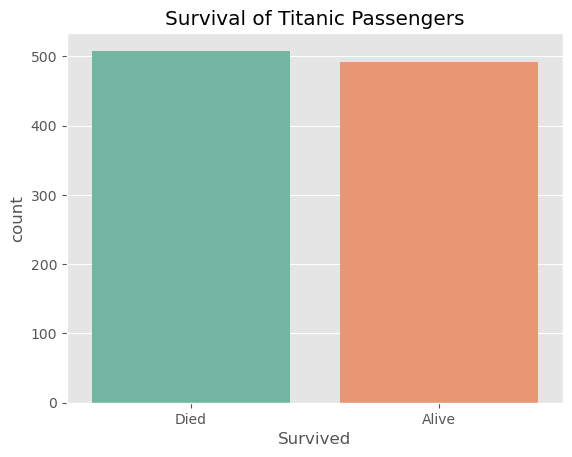

In [54]:
sns.countplot(x="Survived", data=df, palette="Set2")
plt.title("Survival of Titanic Passengers")
plt.xticks([0, 1], ["Died", "Alive"])
plt.show()

Observation: Most passengers did not survive.

Survival Rate by Gender

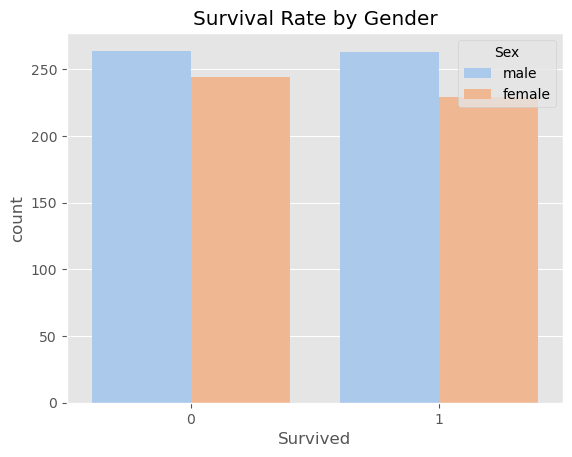

In [60]:
sns.countplot(x="Survived", hue="Sex", data=df, palette="pastel")
plt.title("Survival Rate by Gender")
plt.show()

Male passengers are higher than female passengers

Survival Rate by Class

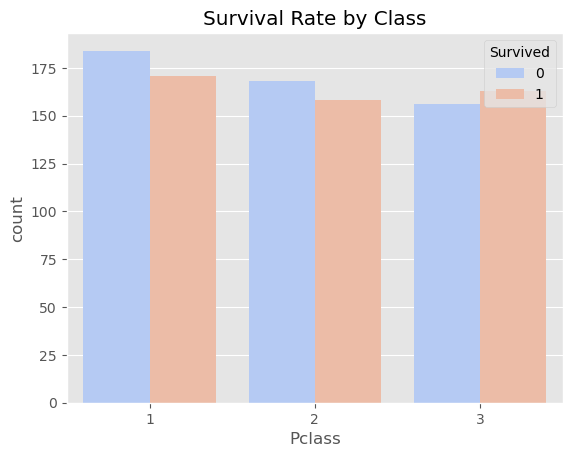

In [64]:
sns.countplot(x="Pclass", hue="Survived", data=df, palette="coolwarm")
plt.title("Survival Rate by Class")
plt.show()

Passengers in class 0 have a higher survival rate. The majority of first class passengers lost their lives.

Age Distribution

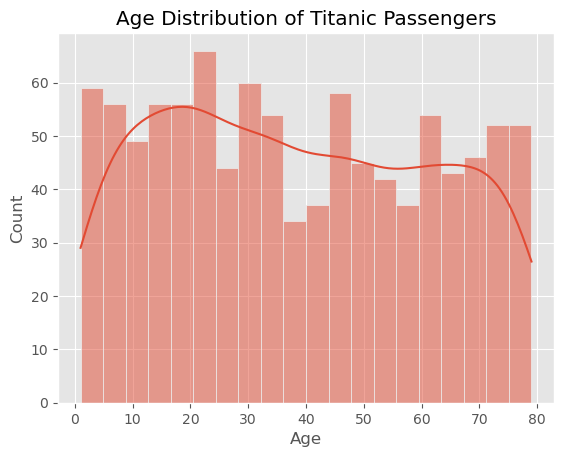

In [69]:
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution of Titanic Passengers")
plt.show()

Most passengers are between 20-40 years old.

Analyzing Survival Rates

In [73]:
# Survival rate by gender
print(df.groupby("Sex")["Survived"].mean())

# Survival rate by passenger class
print(df.groupby("Pclass")["Survived"].mean())

# Survival analysis based on ticket price
print(df.groupby("Survived")["Fare"].mean()) 

Sex
female    0.484144
male      0.499051
Name: Survived, dtype: float64
Pclass
1    0.481690
2    0.484663
3    0.510972
Name: Survived, dtype: float64
Survived
0    250.547835
1    245.305589
Name: Fare, dtype: float64
